## Import lib

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Load Image

In [2]:
## !wget https://assets.gezdev.com/dip/CountCircles.jpg

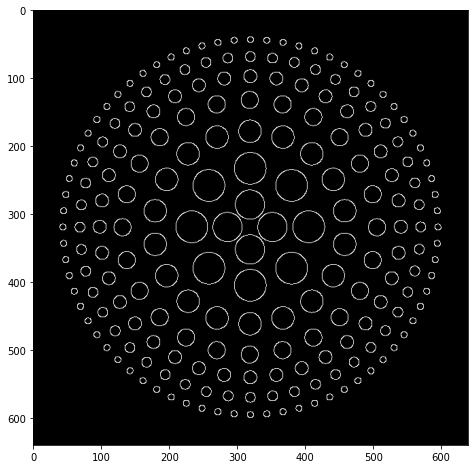

In [3]:
src = cv.imread("./CountCircles.jpg")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

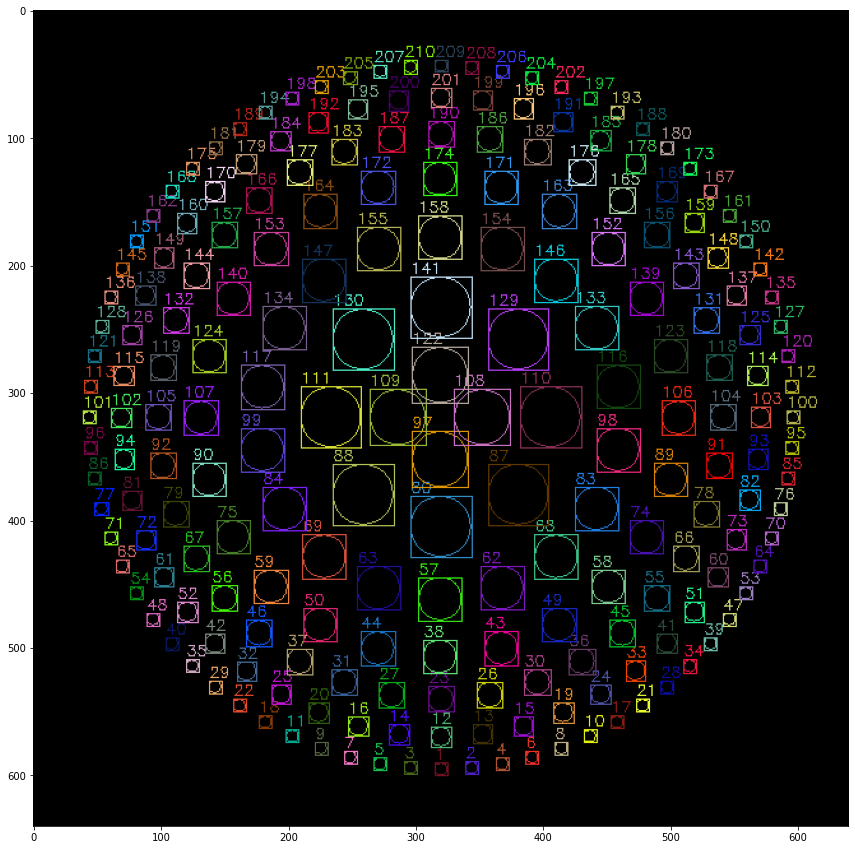

All Circle => 210


In [4]:
from numpy import random ## เรียกใช้งานโหมดสุ่ม
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy() ## สำเนาภาพ
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) ## สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB) ## ใช้สี

for i,value in enumerate(contours): ## ใช้ Loop เข้าใน Contours 
    c = random.randint(255, size=(3))   ## สุ่มค่าสี
    color = (c[0].item(),c[1].item(),c[2].item())   ## ใช้สี
    cv.drawContours(drawn_contour_img, contours, i, color, 1) ## วาด contours
    x,y,w,h = cv.boundingRect(contours[i]) ## กำหนดตัวแปร ไว้สร้างกรอบสี่เหลี่ยม ทุก contours
    cv.putText(drawn_contour_img,str(i+1),(x,y-3),cv.FONT_HERSHEY_SIMPLEX,0.4,color,1)  ## ตัวเลขบอกจำนวนของกรอบสี่เหลี่ยม
    cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1) ## วาดกรอบสี่เหลี่ยม

plt.rcParams["figure.figsize"] = [15, 15] ## ขนาด
plt.imshow(drawn_contour_img)
plt.show()

print(f"All Circle => {i+1}") ## แสดงจำนวนกรอบทั้งหมด